### Import Important Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

### Step1: Import Dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston['data'].shape

(506, 13)

In [6]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bos = pd.DataFrame(boston['data'],columns = boston['feature_names'])

In [8]:
boston['target'].shape

(506,)

In [9]:
bos['PRICE'] = boston['target']

In [10]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


### Step2 Handle missing data

In [12]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
bos=bos.replace('?',np.nan)

In [14]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [15]:
bos.tail(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01,21.8
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59,24.5
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60,23.1


### Step3: EDA

In [16]:
# Overview of the data
#sns.pairplot(bos)

<AxesSubplot:>

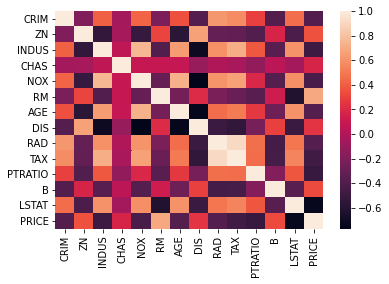

In [17]:
sns.heatmap(bos.corr(), annot=False)

## Step4: Outlier Removal

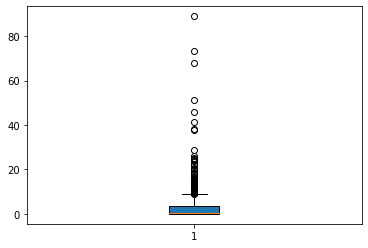

In [18]:
# Features CRIM: per capita crime rate by town

data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(bos['CRIM'],vert=True,patch_artist=True);   

In [19]:
bos['CRIM'] = np.where(bos['CRIM'] > 30, 30, bos['CRIM'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2518c12b040>,
 'caps': [<matplotlib.lines.Line2D at 0x2518c12b700>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2518c11bca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2518c12bdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2518c137160>],
 'means': []}

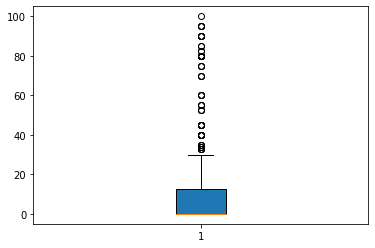

In [20]:
# Features ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(bos['ZN'],vert=True,patch_artist=True)

In [21]:
bos['ZN'] = np.where(bos['ZN'] > 40, 40, bos['ZN'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2518c184520>,
 'caps': [<matplotlib.lines.Line2D at 0x2518c184c40>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2518c141d60>],
 'medians': [<matplotlib.lines.Line2D at 0x2518c191340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2518c1916a0>],
 'means': []}

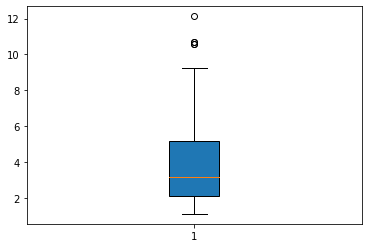

In [22]:
# Features DIS      weighted distances to five Boston employment centres

data = [np.random.normal(0, std, 100) for std in range(1, 3)]

# rectangular box plot
plt.boxplot(bos['DIS'],vert=True,patch_artist=True)

In [23]:
bos['DIS'] = np.where(bos['DIS'] > 9, 9, bos['DIS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2518c1e10d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2518c1e1790>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2518c1d2d30>],
 'medians': [<matplotlib.lines.Line2D at 0x2518c1e1e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2518c1ee1f0>],
 'means': []}

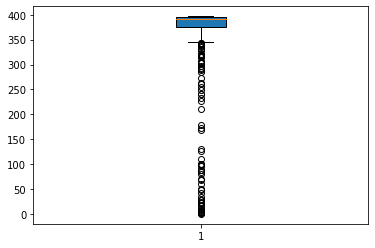

In [24]:
# Features B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

data = [np.random.normal(0, std, 100) for std in range(1, 3)]

# rectangular box plot
plt.boxplot(bos['B'],vert=True,patch_artist=True)

In [25]:
bos['B'] = np.where(bos['B'] < 300, 300, bos['B'])

## Step5 Data Transformation

In [26]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [27]:
# Transformation
df_num  = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]

In [28]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.001877,0.0,0.420455,0.0,0.386831,0.580954,0.681771,0.171402,0.0,0.164122,0.893617,0.949329,0.219095
502,0.001299,0.0,0.420455,0.0,0.386831,0.490324,0.760041,0.147121,0.0,0.164122,0.893617,1.000000,0.202815
503,0.001815,0.0,0.420455,0.0,0.386831,0.654340,0.907312,0.131874,0.0,0.164122,0.893617,1.000000,0.107892
504,0.003443,0.0,0.420455,0.0,0.386831,0.619467,0.889804,0.160005,0.0,0.164122,0.893617,0.964396,0.131071
505,0.001370,0.0,0.420455,0.0,0.386831,0.473079,0.802266,0.174756,0.0,0.164122,0.893617,1.000000,0.169702


In [29]:
# log transform to target variable

#bos['PRICE'] = np.log(bos['PRICE'])

In [30]:
std_transform_feat.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.106767,0.200469,0.391378,0.069170,0.349167,0.521869,0.676364,0.335990,0.371713,0.422208,0.622929,0.788105,0.301409
std,0.202894,0.356970,0.251479,0.253994,0.238431,0.134627,0.289896,0.259541,0.378576,0.321636,0.230313,0.323848,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002525,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.123320,0.130435,0.175573,0.510638,0.777890,0.144040
50%,0.008341,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.264008,0.173913,0.272901,0.686170,0.943653,0.265728
75%,0.122385,0.312500,0.646628,0.000000,0.491770,0.586798,0.938980,0.515708,1.000000,0.914122,0.808511,0.993034,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step6: Prediction

In [31]:
from sklearn.model_selection import train_test_split
X = std_transform_feat
y = bos['PRICE']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
#def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
#    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
#    model.fit(X_train, y_train)
#    preds_val = model.predict(X_test)
#   mae = mean_absolute_error(y_test, preds_val)
#   return(mae)

In [35]:
def get_mse(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=1)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, preds_val)
    return(mse)

In [36]:
#from sklearn.metrics import mean_absolute_error
from sklearn import metrics

candidate_max_leaf_nodes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 150, 200]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes

mse = []
for nodes in candidate_max_leaf_nodes:
    mse.append(get_mse(nodes, X_train, X_test, y_train, y_test))
    
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = candidate_max_leaf_nodes[mse.index(min(mse))]

In [37]:
#print('Max leaf nodes: %d  \t\t Mean Absolute Error: %d' %(candidate_max_leaf_nodes, mae))

mse

[28.184214304686137,
 28.466081445278075,
 25.879138787581944,
 25.10806589916846,
 25.31218449246817,
 24.940136260645556,
 24.56011847840976,
 24.80691799041086,
 24.89218162803265,
 24.849292618737824,
 24.79814255624293,
 24.692072592727644,
 24.191859402598755,
 24.330340241228072]

In [38]:
DTR = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 1)

In [39]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=150, random_state=1)

In [40]:
predictions = DTR.predict(X_test)

In [41]:
from scipy import stats
x = y_test
y = predictions
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

idx = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']
data = np.array([slope, intercept, r_value, p_value, std_err])

print(pd.DataFrame(data= data, index= idx , columns =['values']))

regline = lambda S: 0.7466*x +6.0860359
S=np.array([x.min(),x.max()])

                 values
slope      8.524946e-01
intercept  3.289445e+00
r_value    8.520760e-01
p_value    5.115929e-44
std_err    4.275790e-02


Text(0.5, 1.0, 'Predicted Prices vs Prices')

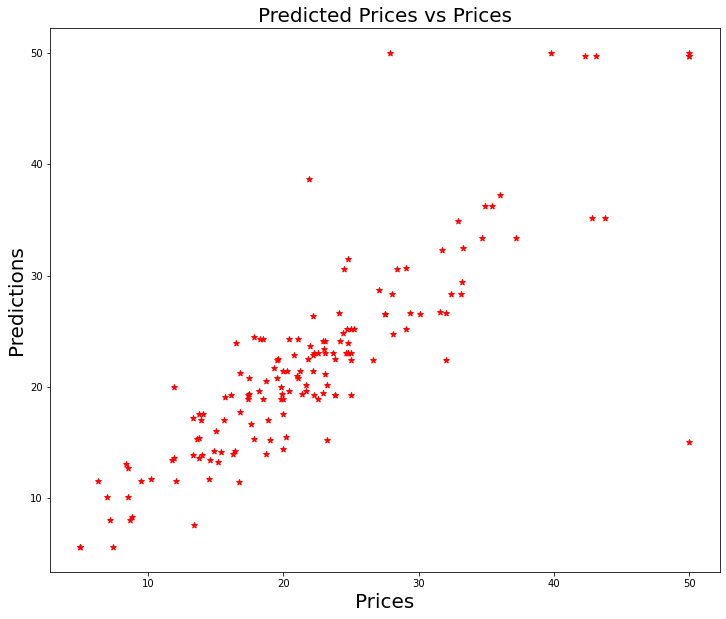

In [42]:
plt.figure(figsize=(12,10))
plt.scatter(y_test,predictions,color='Red',marker='*')
#plt.plot(x,regline(S),lw=1, c="BLUE")

plt.xlabel("Prices",{'size':20})
plt.ylabel("Predictions",{'size':20})

plt.title("Predicted Prices vs Prices",{'size':20})

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


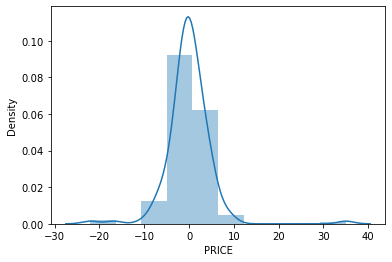

In [43]:
#Residual Histogram

sns.distplot((y_test-predictions),bins=10);

In [44]:
X_test.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
453,0.274784,0.0,0.646628,0.0,0.674897,0.734240,0.992791,0.168111,1.000000,0.914122,0.808511,0.782972,0.414183
505,0.001370,0.0,0.420455,0.0,0.386831,0.473079,0.802266,0.174756,0.000000,0.164122,0.893617,1.000000,0.169702
126,0.012704,0.0,0.923387,0.0,0.403292,0.393179,0.954686,0.079742,0.043478,0.001908,0.691489,0.611868,0.704470
24,0.024803,0.0,0.281525,0.0,0.314815,0.452769,0.939238,0.415481,0.130435,0.229008,0.893617,0.973478,0.402042
329,0.002031,0.0,0.101906,0.0,0.154321,0.531136,0.147271,0.519033,0.130435,0.463740,0.457447,0.776161,0.154801


In [45]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(20)

,Actual value,Predicted value
453,17.8,24.450000
505,11.9,19.980000
126,15.7,19.100000
24,15.6,17.050000
329,22.6,23.066667
393,13.8,17.550000
170,17.4,18.900000
325,24.6,23.071429
357,21.7,20.200000
460,16.4,14.250000


## Step7: Model Evaluate

In [46]:
from sklearn import metrics

print('R squared: {:.2f}'.format(DTR.score(X_train,y_train)*100))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R squared: 99.79
MAE: 2.9929996867167916
MSE: 24.191859402598755
RMSE: 4.918522075034202
